In [29]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [30]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


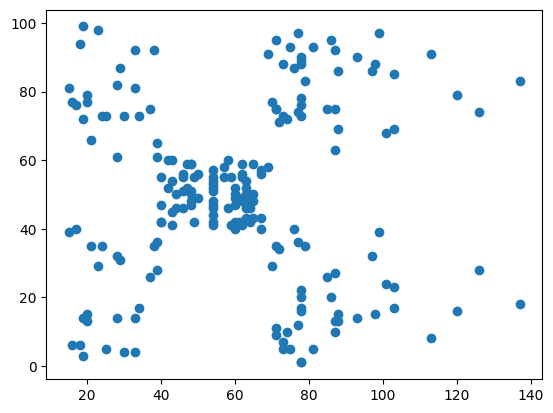

In [31]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.show()

In [32]:
scale = StandardScaler()
x_scale = scale.fit_transform(df[['Annual Income (k$)','Spending Score (1-100)']])
x_scale

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

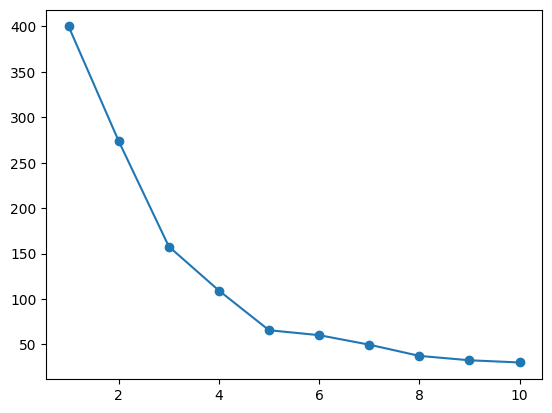

In [33]:
wscc= []
for i in range(1,11):
    Kmeans=KMeans(n_clusters=i,random_state=42)
    x = Kmeans.fit_predict(x_scale)
    wscc.append(Kmeans.inertia_)

plt.plot(range(1,11),wscc,marker='o')
plt.show()

In [34]:
Kmeans = KMeans(n_clusters=5,random_state=42)
df['cluster'] = Kmeans.fit_predict(x_scale)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


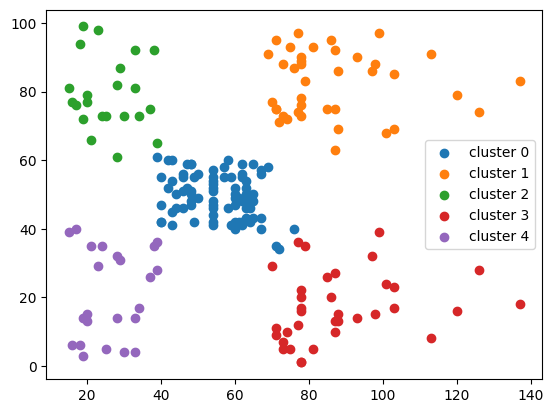

In [38]:
for cluster in range(0,5):
    plt.scatter(
        df[df['cluster']==cluster]['Annual Income (k$)'],
        df[df['cluster']==cluster]['Spending Score (1-100)'],
        label = f"cluster {cluster}"
    )
plt.legend()
plt.show()

In [36]:
import joblib

joblib.dump(scale,'scaler.plk')
joblib.dump(Kmeans,'model.plk')

['model.plk']